# Advanced WWT

In [1]:
import PFAS_SAT as ps
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_colwidth', 0)

## Model document


<img src="../Images/ProcessModels/AdvWWT.png" alt="Drawing" style="width: 700px;"/>

## Input Parameters for Advanced WWT model

In [2]:
AdvWWT = ps.AdvWWT()
AdvWWT.InputData.Data[['Category','Dictonary_Name','Parameter Name', 'Parameter Description', 'amount', 'unit','Reference']]

,Category,Dictonary_Name,Parameter Name,Parameter Description,amount,unit,Reference
0,Treatment option,Trtmnt_optn,frac_to_RO,Fraction of incoming PFAS-containing water to RO,0.000000,fraction,NaN
1,Treatment option,Trtmnt_optn,frac_to_GAC,Fraction of incoming PFAS-containing water to GAC,1.000000,fraction,NaN
2,Treatment option,Trtmnt_optn,frac_to_IonEx,Fraction of incoming PFAS-containing water to Ion Exchange,0.000000,fraction,NaN
3,RO paramteres,RO,ts_rem_med,Solids content of RO concentrate wet,0.017663,fraction,NaN
4,RO paramteres,RO,VS_rem_med,VS content of RO concentrate - dry,0.700000,kg VS/kg TS,NaN
5,RO paramteres,RO,C_rem_med,C of RO concentrate - dry,0.001207,fraction TS,NaN
6,RO paramteres,RO,frac_effl_rem_med,RO concentrate fraction relative to total water treated,0.150000,fraction,NaN
7,RO Removal Efficiency,RO_RemEff,PFOA,PFOA removal efficiency,0.990000,fraction,NaN
8,RO Removal Efficiency,RO_RemEff,PFOS,PFOS removal efficiency,0.990000,fraction,NaN
9,RO Removal Efficiency,RO_RemEff,PFBA,PFBA removal efficiency,0.990000,fraction,NaN


## Incoming Waste Water to WWT

In [3]:
InputFlow = ps.IncomFlow()
InputFlow.set_flow('ContaminatedWater',1000)
InputFlow.calc()
ContaminatedWater = InputFlow.Inc_flow
ContaminatedWater.report()

,Parameter,Unit,Amount
0,Mass flow,kg,1000
1,Solids flow,kg,5
2,Moisture flow,kg,995
3,Volume flow,L,1000
4,Carbon flow,kg,2.5
5,PFOA,μg,100000
6,PFOS,μg,100000
7,PFBA,μg,100000
8,PFPeA,μg,100000
9,PFHxA,μg,100000


## PFAS balance in Advanced WWT (Using GAC)

In [4]:
AdvWWT.InputData.Trtmnt_optn['frac_to_RO']['amount'] = 0
AdvWWT.InputData.Trtmnt_optn['frac_to_GAC']['amount'] = 1
AdvWWT.InputData.Trtmnt_optn['frac_to_IonEx']['amount'] = 0
AdvWWT.calc(Inc_flow=ContaminatedWater)
AdvWWT.report(normalized=True)

,Effluent RO,RO Concentrate,Effluent GAC,Spent GAC,Effluent IonExchange,Spent IER
PFOA,0.0,0.0,10.0,90.0,0.0,0.0
PFOS,0.0,0.0,10.0,90.0,0.0,0.0
PFBA,0.0,0.0,10.0,90.0,0.0,0.0
PFPeA,0.0,0.0,10.0,90.0,0.0,0.0
PFHxA,0.0,0.0,10.0,90.0,0.0,0.0
PFHpA,0.0,0.0,10.0,90.0,0.0,0.0
PFNA,0.0,0.0,10.0,90.0,0.0,0.0
PFDA,0.0,0.0,10.0,90.0,0.0,0.0
PFBS,0.0,0.0,10.0,90.0,0.0,0.0
PFHxS,0.0,0.0,10.0,90.0,0.0,0.0


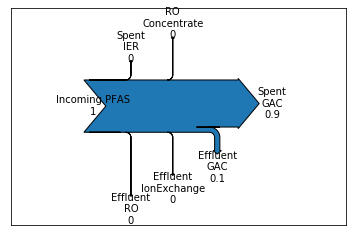

In [5]:
AdvWWT.plot_sankey(gap=0.8)

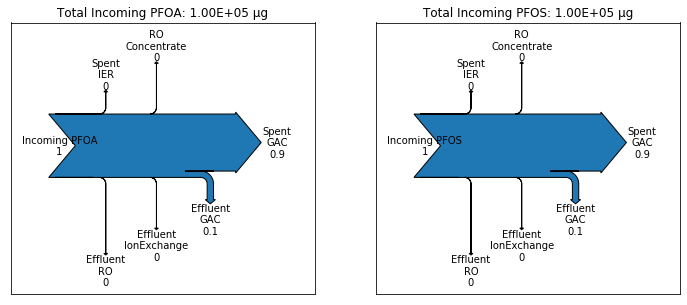

In [6]:
AdvWWT.plot_sankey_report(margin=.6, gap=.8)

## Adv WWT: Spent GAC

In [7]:
AdvWWT.SpentGAC.report()

,Parameter,Unit,Amount
0,Mass flow,kg,87.00
1,Solids flow,kg,78.30
2,Moisture flow,kg,8.70
3,VS flow,kg,70.47
4,Carbon flow,kg,54.81
5,PFOA,μg,90000.00
6,PFOS,μg,90000.00
7,PFBA,μg,90000.00
8,PFPeA,μg,90000.00
9,PFHxA,μg,90000.00


In [8]:
print("Flow Type: {} \nGAC mass: {} kg".format(AdvWWT.SpentGAC.FlowType,AdvWWT.SpentGAC.GAC_mass))

Flow Type: SpentGAC 
GAC mass: 87.0 kg
